<h1 style="font-size: 1.6rem; font-weight: bold">ITO 5047: Fundamentals of Artificial Intelligence</h1>
<h1 style="font-size: 1.6rem; font-weight: bold">Deep Artificial Neural Networks</h1>
<p style="margin-top: 5px; margin-bottom: 5px;">Monash University Australia</p>
<p style="margin-top: 5px; margin-bottom: 5px;">Jupyter Notebook by: Tristan Sim Yook Min</p>
References: Information Source from Monash Faculty of Information Technology

---

Deep ANNs extend basic perceptrons by adding hidden layers between input and output, enabling complex pattern recognition and non-linear mapping capabilities.

### **Multi-layer Feed-forward Architecture**

These networks contain hidden layers where information flows unidirectionally from input through hidden layers to output. Each layer processes input from the previous layer and sends results to the next layer, creating hierarchical feature extraction.

The critical advancement is replacing step functions with sigmoid activation functions. Sigmoid provides smooth, differentiable outputs necessary for gradient-based training algorithms. This makes each neuron a sigmoid perceptron, enabling backpropagation learning.

The network creates a functional hierarchy: output units depend on hidden units, which depend on input units.

For the example network with input vector **x** = (x₁, x₂):
* Input activations: (a₁, a₂) = (x₁, x₂)  
* Hidden unit outputs: a₃ = σ(w₁₃a₁ + w₂₃a₂ + w₃a₃), a₄ = σ(w₁₄a₁ + w₂₄a₂ + w₄a₄)
* Final output: a₅ = σ(w₃₅a₃ + w₄₅a₄ + w₅a₅)

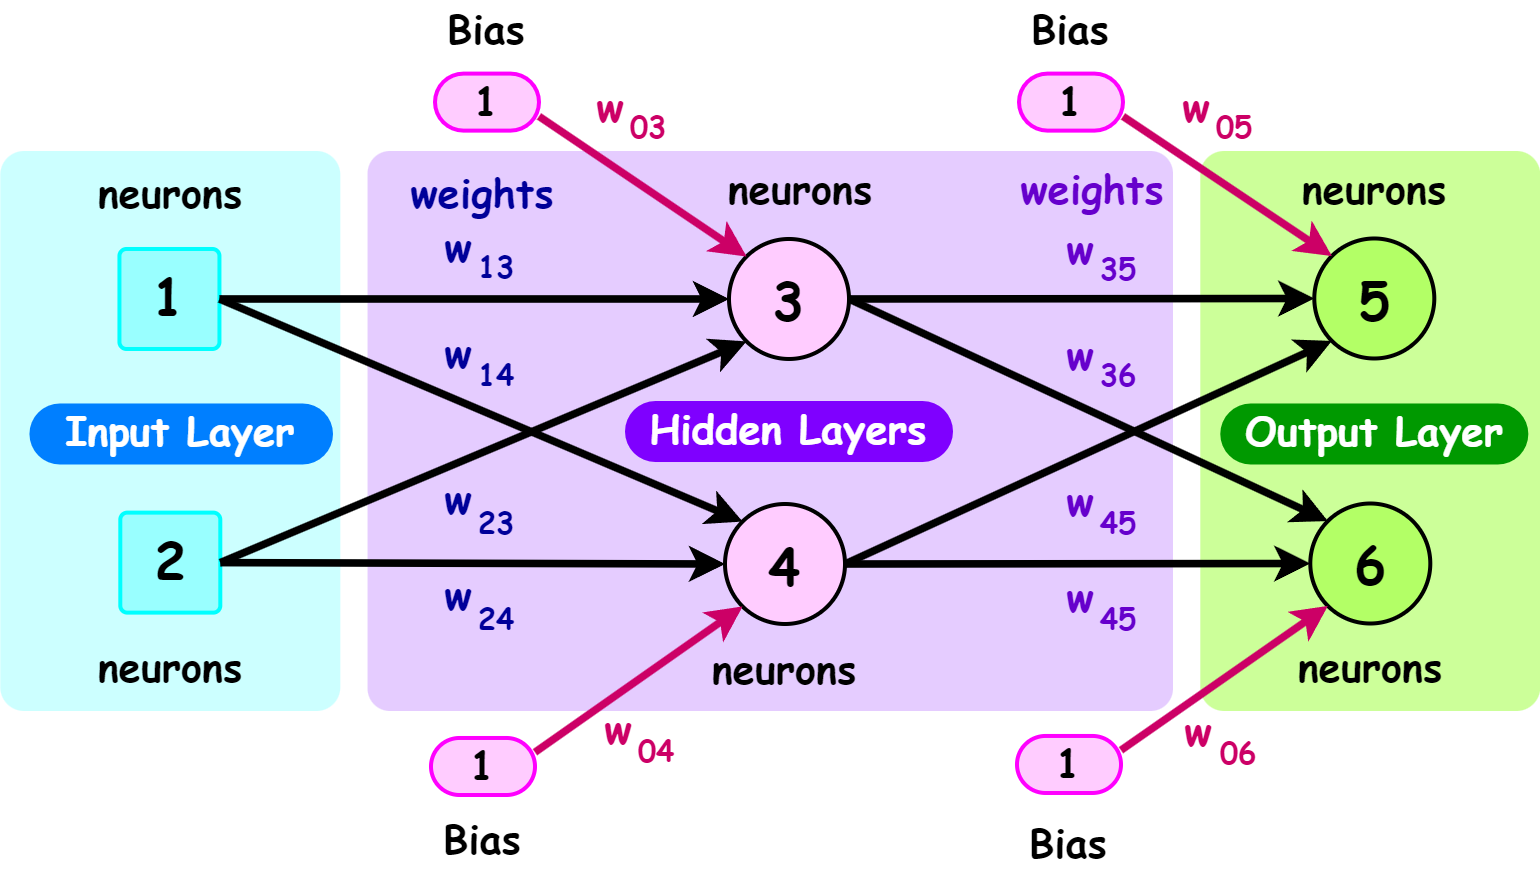

### **Sigmoid Activation Function**

The sigmoid function provides smooth activation:

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

Its derivative, essential for backpropagation:

$$\sigma'(z) = \sigma(z)(1 - \sigma(z))$$

### **Network Expressiveness**

Sigmoid activation with smooth thresholds allows multi-layer networks to approximate complex functions through hierarchical combinations of simple threshold functions.

The visualization shows how multiple sigmoid units create sophisticated decision boundaries:
- Two opposing thresholds form ridge-like boundaries
- Four perpendicular thresholds create localized peaks

Each hidden unit contributes a smooth threshold oriented differently. Combined through weighted connections, these create intricate decision surfaces impossible for single-layer networks.

### **Matrix Representation**

For our specific example network, the complete flow from input to output:

**Input Layer:**
$\begin{bmatrix} a_1 \\ a_2 \end{bmatrix} = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}$

**Hidden Layer:**
$\begin{bmatrix} a_3 \\ a_4 \end{bmatrix} = \sigma\left(\begin{bmatrix} w_{13} & w_{23} \\ w_{14} & w_{24} \end{bmatrix} \begin{bmatrix} a_1 \\ a_2 \end{bmatrix} + \begin{bmatrix} w_{33} \\ w_{44} \end{bmatrix}\right)$

**Output Layer:**
$a_5 = \sigma\left(\begin{bmatrix} w_{35} & w_{45} \end{bmatrix} \begin{bmatrix} a_3 \\ a_4 \end{bmatrix} + w_{55}\right)$

Where weights w₃₃, w₄₄, w₅₅ represent bias terms for units 3, 4, and 5 respectively.

### **Forward Propagation Process**

Information transforms through successive layers:
1. **Input:** (a₁, a₂) = (x₁, x₂)
2. **Hidden:** a₃ = σ(w₁₃a₁ + w₂₃a₂ + w₃a₃), a₄ = σ(w₁₄a₁ + w₂₄a₂ + w₄a₄)  
3. **Output:** a₅ = σ(w₃₅a₃ + w₄₅a₄ + w₅a₅)

### **Loss Function for Learning**

The loss function quantifies prediction errors by measuring differences between network outputs and target values:

$Loss(w) = \frac{1}{2m} \sum_{k=1}^{m} (y_k - a_k)^2$

**Purpose of Loss Function**
- **Learning objective:** Provides a concrete goal for the network to minimize prediction errors
- **Weight optimization:** Enables gradient calculation to determine how each weight should change
- **Performance measurement:** Quantifies how well the network performs on training data
- **Training guidance:** Gives direction for parameter updates during learning

### **Gradient Descent Training**

The gradient descent algorithm finds optimal weights by:

$\frac{\partial}{\partial w} Loss(w) = \frac{\partial}{\partial w} \frac{1}{2m} \sum_{k=1}^{m} (y_k - a_k)^2 = \frac{1}{m} \sum_{k=1}^{m} \frac{\partial}{\partial w} (y_k - a_k)^2$

Weight updates follow: $w \leftarrow w - \alpha \frac{\partial Loss}{\partial w}$

Computing gradients requires the chain rule to backpropagate error signals through network layers, enabling efficient training of deep architectures for non-linearly separable problems.

---